# 0.0. Imports

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib            import pyplot as plt
from IPython.core.display  import HTML
from IPython.display       import Image

## 0.1. Useful Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    sns.set_theme(context = 'notebook', palette = 'Paired')

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading the Data

In [4]:
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

# 1.0. Data Description

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1.1. Renaming Residence Column

In [6]:
df.rename(columns = {'Residence_type': 'residence_type'}, inplace = True)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## 1.2. Data Dimensions

In [8]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 5110
Number of Cols: 12


## 1.3. Data Types

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## 1.4. Check for Null Values

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 1.5. Drop NA Values

In [11]:
df.dropna(axis = 0, inplace = True)

In [12]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 1.6. Descriptive Statistics

### 1.6.1. Numerical Attributes

In [13]:
aux = df.select_dtypes(include = ['int64', 'float64'])

In [14]:
# Mean and Median
ct1 = pd.DataFrame( aux.apply( np.mean ) ).T
ct2 = pd.DataFrame( aux.apply( np.median ) ).T

# STD, Min, Max, Range, Skew and Kurtosis
d1 = pd.DataFrame( aux.apply( np.std ) ).T 
d2 = pd.DataFrame( aux.apply( min ) ).T 
d3 = pd.DataFrame( aux.apply( max ) ).T 
d4 = pd.DataFrame( aux.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( aux.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( aux.apply( lambda x: x.kurtosis() ) ).T 

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,77.00,72940.00,72863.00,37064.313506,37608.00,20992.959919,-0.039951,-1.205060
1,age,0.08,82.00,81.92,42.865374,44.00,22.552818,-0.119070,-0.988091
2,hypertension,0.00,1.00,1.00,0.091872,0.00,0.288845,2.826791,5.993192
3,heart_disease,0.00,1.00,1.00,0.049501,0.00,0.216911,4.155030,15.270496
4,avg_glucose_level,55.12,271.74,216.62,105.305150,91.68,44.419816,1.614026,1.905601
5,bmi,10.30,97.60,87.30,28.893237,28.10,7.853267,1.055340,3.362659
6,stroke,0.00,1.00,1.00,0.042575,0.00,0.201897,4.532666,18.552620


### 1.6.2. Categorical Attributes

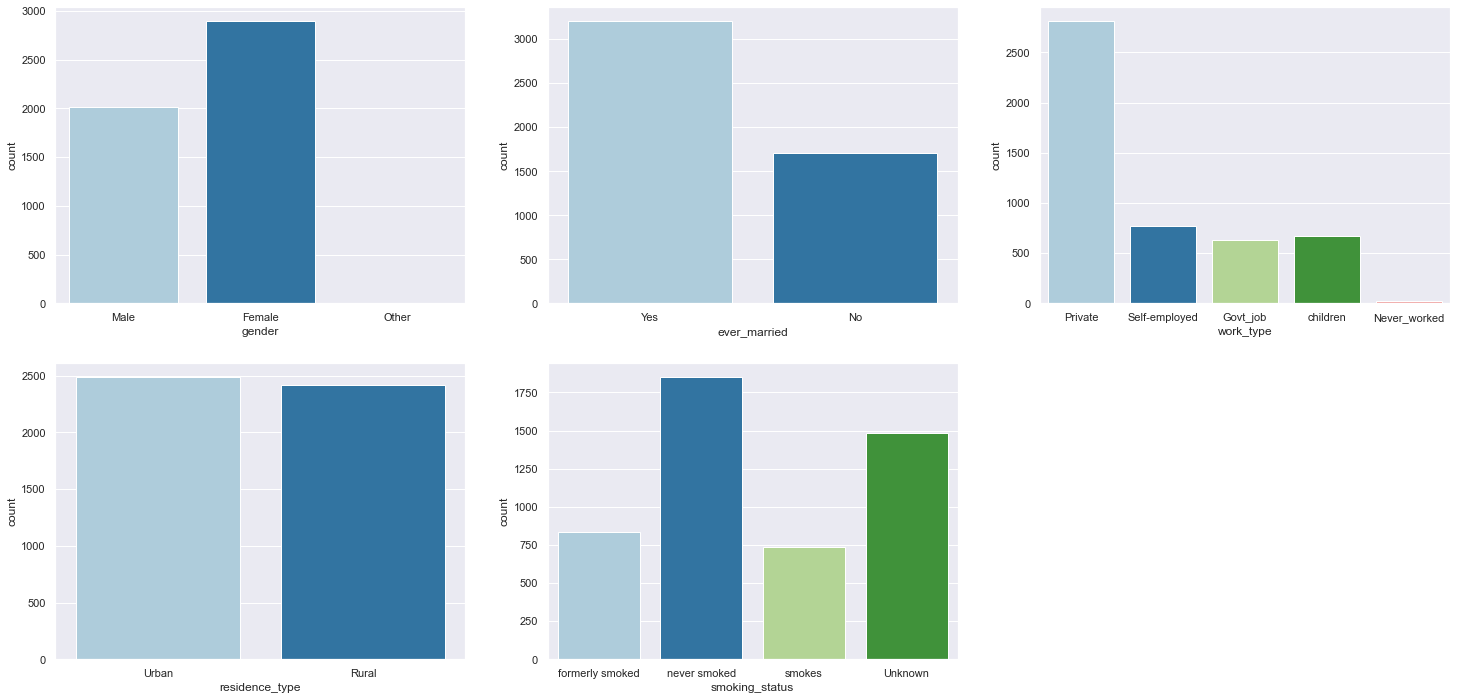

In [15]:
plt.subplot(2, 3, 1)
sns.countplot(data = df, x = 'gender');

plt.subplot(2, 3, 2)
sns.countplot(data = df, x = 'ever_married');

plt.subplot(2, 3, 3)
sns.countplot(data = df, x = 'work_type');

plt.subplot(2, 3, 4)
sns.countplot(data = df, x = 'residence_type');

plt.subplot(2, 3, 5)
sns.countplot(data = df, x = 'smoking_status');

# 2.0. Feature Engineering

## 2.1. Mind Map

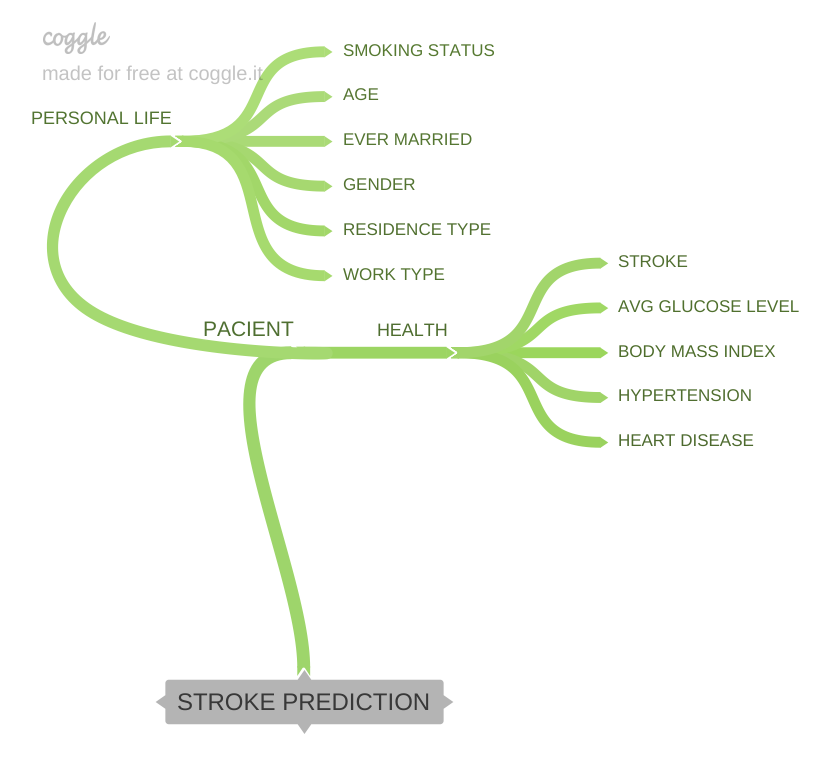

In [2]:
Image( '../img/mind map.png', width=620, height=620 )

## 2.2. Hypotheses

- Age
1. Pacients under 30 are less likely to stroke
2. Pacients over 60 are more likely to stroke

- Gender
1. Male pacients are more likely to stroke

- Health
1. Pacients with BMI higher than 40 are more likely to stroke
2. Pacients with BMI lower than 20 are less likely to stroke
3. Pacients with hyptertension are more likely to stroke
4. Pacients who never smoked have less chances of stroke
5. Pacients who smokes have higher probability to stroke
6. Pacients with heart diseases are more likely to stroke
7. Pacients with avg glucose level higher than 120 are more likely to stroke
8. Pacients with no heart diseases won't stroke